In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
churn_data=pd.read_csv('Churn_Modelling.csv')
churn_data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
churn_data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
print('Before droppping duplicates : ',churn_data.shape)
churn_data=churn_data.drop_duplicates()
print('After droppping duplicates : ',churn_data.shape)

Before droppping duplicates :  (10000, 14)
After droppping duplicates :  (10000, 14)


In [9]:
churn_data.drop(['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

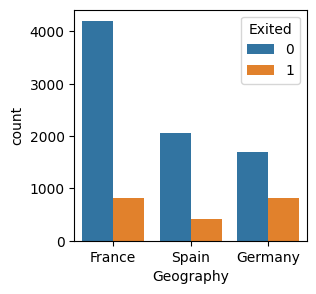

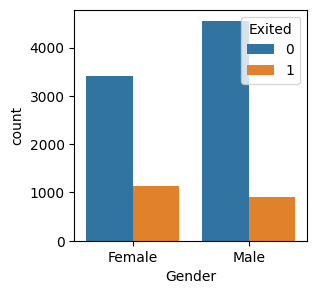

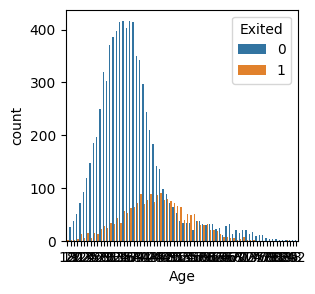

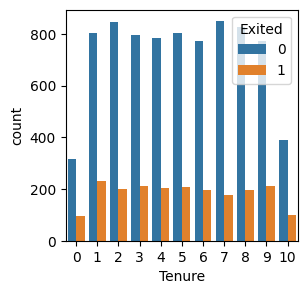

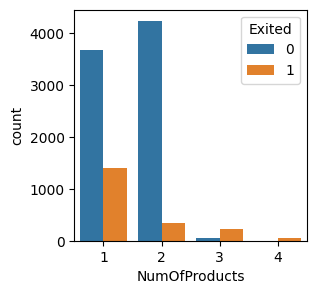

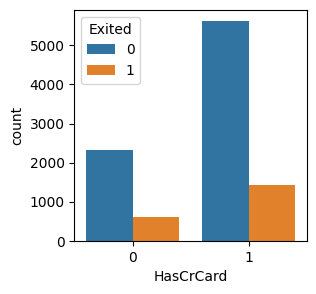

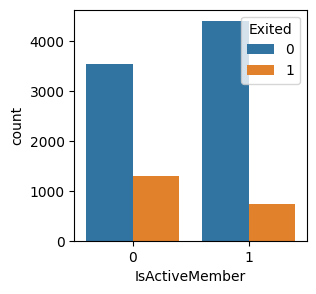

In [29]:
for i , c in enumerate(churn_data.drop(columns=['Exited','Balance','EstimatedSalary','CreditScore'])):
    plt.figure(i, figsize=(3, 3))
    sns.countplot(data=churn_data,x=c,hue='Exited')

<Axes: >

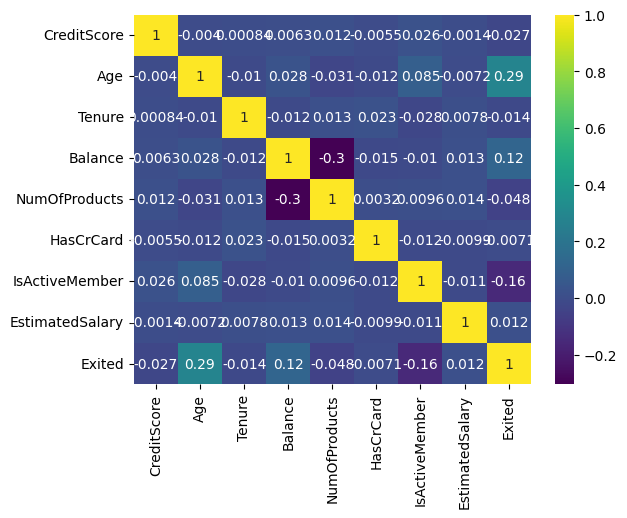

In [26]:
sns.heatmap(churn_data.corr(numeric_only=True),annot=True,cmap='viridis')

In [30]:
X=churn_data.drop('Exited', axis=1)
Y=churn_data['Exited']

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
ct=ColumnTransformer(
    [
        ('ohe',OneHotEncoder(drop='first'),['Geography','Gender']),
        ('sc',StandardScaler(),['CreditScore','Age','Balance','EstimatedSalary']),
    ]
)
X= ct.fit_transform(X)
X

array([[ 0.        ,  0.        ,  0.        , ...,  0.29351742,
        -1.22584767,  0.02188649],
       [ 0.        ,  1.        ,  0.        , ...,  0.19816383,
         0.11735002,  0.21653375],
       [ 0.        ,  0.        ,  0.        , ...,  0.29351742,
         1.33305335,  0.2406869 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.27860412,
        -1.22584767, -1.00864308],
       [ 1.        ,  0.        ,  1.        , ...,  0.29351742,
        -0.02260751, -0.12523071],
       [ 0.        ,  0.        ,  0.        , ..., -1.04143285,
         0.85996499, -1.07636976]])

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

[0 1 0 ... 0 0 0]
Accuracy Score of logistic regression :  0.793


Text(0, 0.5, 'Y_test')

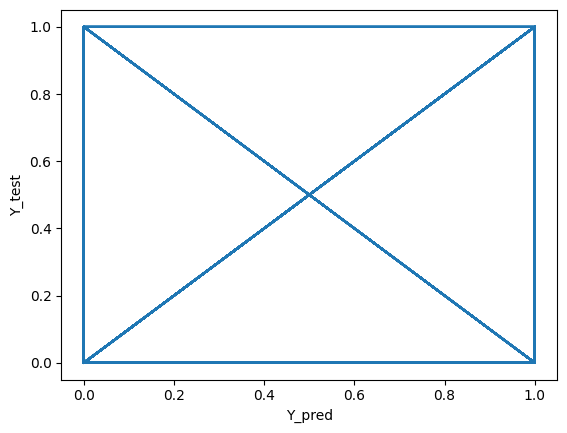

In [47]:
accuracy_list=[]
#logistic regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
print(Y_pred)
accuracy_list.append(accuracy_score(Y_test,Y_pred))
print('Accuracy Score of logistic regression : ',accuracy_score(Y_test,Y_pred))

plt.plot(Y_test,Y_pred)

plt.xlabel('Y_pred')

plt.ylabel('Y_test')

[0 1 0 ... 0 0 0]
Accuracy Score of random forest :  0.8175


Text(0, 0.5, 'Y_test')

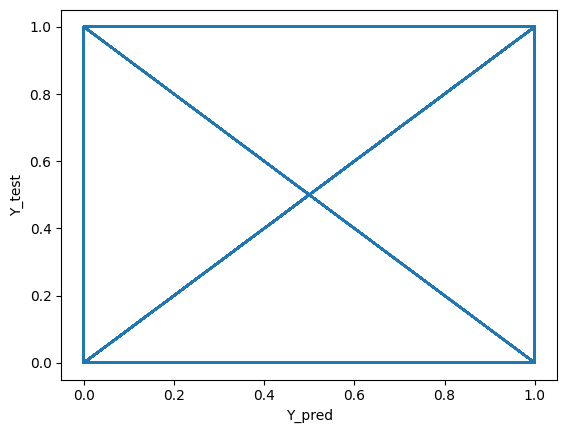

In [46]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
print(Y_pred)
accuracy_list.append(accuracy_score(Y_test,Y_pred))

print('Accuracy Score of random forest : ',accuracy_score(Y_test,Y_pred))
plt.plot(Y_test,Y_pred)
plt.xlabel('Y_pred')

plt.ylabel('Y_test')

[0 0 0 ... 0 0 0]
Accuracy Score of gradient boosting :  0.821


Text(0, 0.5, 'Y_test')

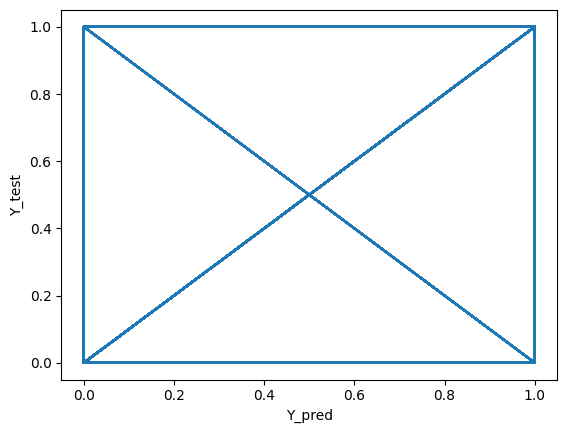

In [48]:
#gradient classification

from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)
Y_pred=gb.predict(X_test)
print(Y_pred) 
accuracy_list.append(accuracy_score(Y_test,Y_pred))
print('Accuracy Score of gradient boosting : ',accuracy_score(Y_test,Y_pred))

plt.plot(Y_test,Y_pred)

plt.xlabel('Y_pred')

plt.ylabel('Y_test')

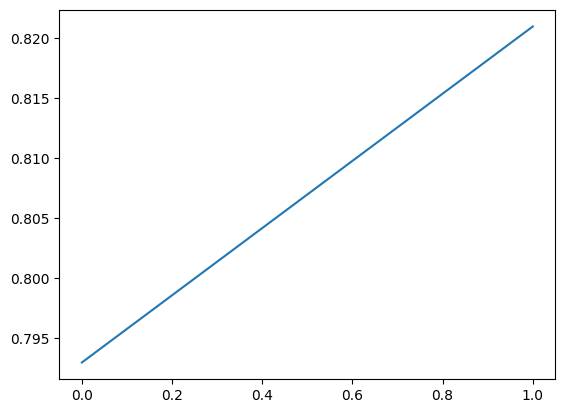

In [51]:
plt.plot(accuracy_list)